In [ ]:
#import Libraries
import numpy as np
import pandas as pd

from numpy import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss


from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import StratifiedKFold
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
# from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve





In [ ]:
df= pd.read_csv("/content/drive/MyDrive/Data/full_data.csv")

In [ ]:
# original Dataset has 6362620 rows and 11 columns
df.shape

(4981, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [ ]:
# Check duplicates
len(df[df.duplicated()])

0

In [ ]:
# observations containing null values
# df.dropna(inplace=True)
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
df['gender'].value_counts()

Female    2907
Male      2074
Name: gender, dtype: int64

In [ ]:
df['gender'] = df['gender'].replace({'Male':1,'Female':0})

In [ ]:
df['ever_married'].value_counts()

Yes    3280
No     1701
Name: ever_married, dtype: int64

In [ ]:
df['ever_married'] = df['ever_married'].replace({'Yes':1,'No':0})

In [ ]:
df['work_type'].value_counts()

Private          2860
Self-employed     804
children          673
Govt_job          644
Name: work_type, dtype: int64

In [ ]:
df['work_type'] = df['work_type'].replace({'Private':1,'Self-employed':2,'children':3,'Govt_job':4})

In [ ]:
df['Residence_type'].value_counts()

Urban    2532
Rural    2449
Name: Residence_type, dtype: int64

In [ ]:
df['Residence_type'] = df['Residence_type'].replace({'Urban':1,'Rural':0})

In [ ]:
df['smoking_status'].value_counts()

never smoked       1838
Unknown            1500
formerly smoked     867
smokes              776
Name: smoking_status, dtype: int64

In [ ]:
df['smoking_status'] = df['smoking_status'].replace({'never smoked':1,'Unknown':2,'formerly smoked':3,'smokes':0})

In [ ]:
df['stroke'].value_counts()

0    4733
1     248
Name: stroke, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   int64  
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   int64  
 5   work_type          4981 non-null   int64  
 6   Residence_type     4981 non-null   int64  
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   int64  
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 428.2 KB


In [ ]:
data = df.copy()

In [ ]:

X = data.iloc[:, data.columns != 'stroke']
y = data.iloc[:, data.columns == 'stroke']

number_records_fraud = len (data[data.stroke==1])

fraud_indices = np.array (data[data.stroke==1].index)
normal_indices = np.array (data[data.stroke==0].index)


random_normal_indices = np.random.choice (normal_indices, number_records_fraud, replace = False )

under_sample_indices = np.concatenate ([fraud_indices, random_normal_indices])


under_sample_data = data.loc[under_sample_indices,:]

X_undersample = under_sample_data.iloc [:, under_sample_data.columns != 'stroke'];
y_undersample = under_sample_data.iloc [:, under_sample_data.columns == 'stroke'];


from sklearn.model_selection import train_test_split
#X_train_old, X_test, y_train, y_test = train_test_split (X,y, test_size = 0.3, random_state = 0)
X_train, X_test, y_train, y_test = train_test_split (X_undersample,y_undersample, test_size = 0.3, random_state = 0)


In [ ]:
print("Number of data points in train data :",X_train.shape)
print("Number of data points in test data :",X_test.shape)

Number of data points in train data : (347, 10)
Number of data points in test data : (149, 10)


In [ ]:
X_train.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
5,1,74.0,1,1,1,1,0,70.09,27.4,1
141,0,80.0,1,0,1,2,0,91.02,32.9,3


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train)
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test)


In [ ]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j

    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column


    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row

    plt.figure(figsize=(20,4))

    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")

    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")

    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")

    plt.show()

Log loss on Test Data using Random Model 0.7826078381207734


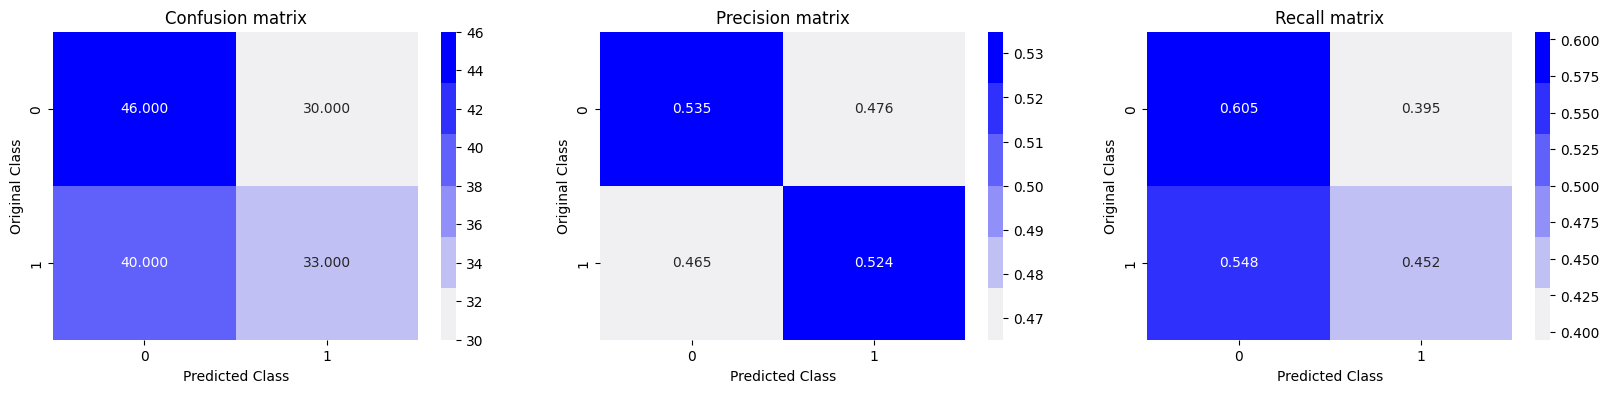

In [ ]:
## Machine Learning Models

## Building a random model (Finding worst-case log-loss)

import numpy as np
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
# we create a output array that has exactly same size as the CV data
test_len = len(y_test)
predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test, predicted_y, eps=1e-15))

predicted_y =np.argmax(predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

For values of alpha =  1e-05 The log loss is: 0.6176591059096107
For values of alpha =  0.0001 The log loss is: 0.5764113816791159
For values of alpha =  0.001 The log loss is: 0.5260272503749107
For values of alpha =  0.01 The log loss is: 0.5025710670368401
For values of alpha =  0.1 The log loss is: 0.508161338979221
For values of alpha =  1 The log loss is: 0.5266944278650666
For values of alpha =  10 The log loss is: 0.5337301349085599


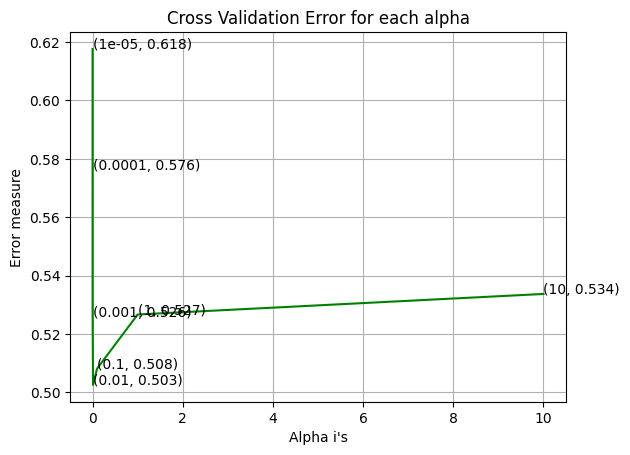

For values of best alpha =  0.01 The train log loss is: 0.5275813026289307
For values of best alpha =  0.01 The test log loss is: 0.5025710670368401
Total number of data points : 149


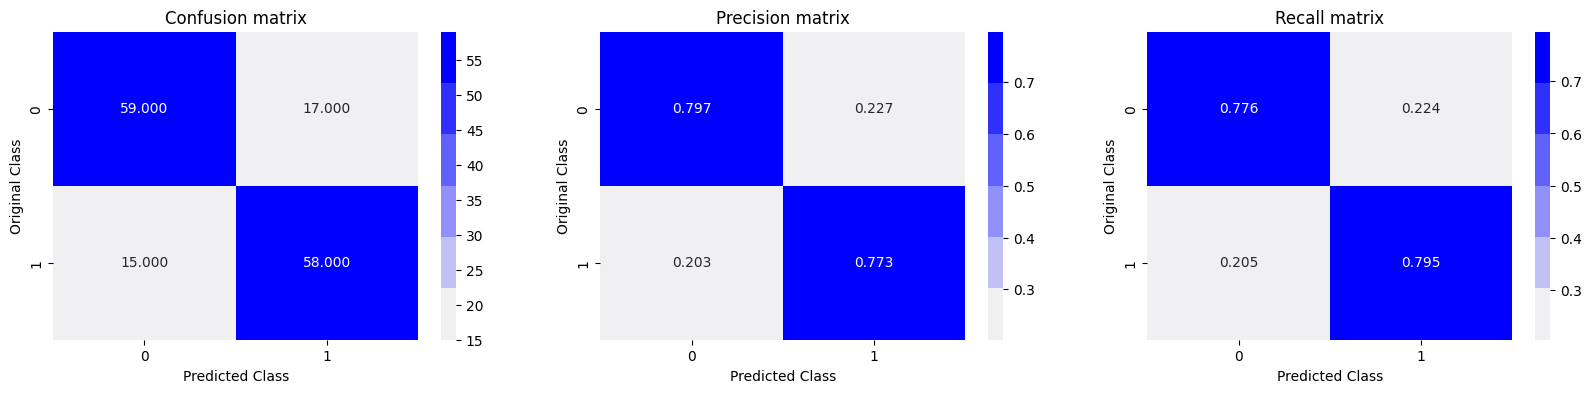

In [ ]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

In [ ]:
import pickle
pickle.dump(sig_clf, open('/content/drive/MyDrive/final_prediction.pickle', 'wb'))
pickle.dump(scaler, open('/content/drive/MyDrive/scaler.pickle', 'wb'))